# 1.- Importar librerias

Pertenece a la familia de clustering basado en densidad, a diferencia K-means se caracteriza en clustering basado en centroide. DBSCAN no necesita la utilización de numero de clusters.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA


%matplotlib notebook


# 2.- Importar dataset

https://www.kaggle.com/robjan/ph-recognition

In [2]:
df = pd.read_csv('ph-data.csv')


# 3.- Visualizar dataframe

In [3]:
df

blue  green  red  label
0      36     27  231      0
1      36     84  250      1
2      37    164  255      2
3      22    205  255      3
4      38    223  221      4
..    ...    ...  ...    ...
648   201    123    0     10
649   203     51   46     11
650   169     62   48     12
651   173     37   79     13
652   131      2   77     14

[653 rows x 4 columns]

# 4.- Preprocesamiento

In [4]:
df.columns

Index(['blue', 'green', 'red', 'label'], dtype='object')

In [5]:
df.describe(include='all')

blue       green         red       label
count  653.000000  653.000000  653.000000  653.000000
mean    89.290965  130.094946  120.655436    7.055130
std     74.974850   72.487085   89.581264    4.287951
min      0.000000    0.000000    0.000000    0.000000
25%     22.000000   68.000000   52.000000    3.000000
50%     67.000000  146.000000   90.000000    7.000000
75%    162.000000  189.000000  224.000000   11.000000
max    255.000000  255.000000  255.000000   14.000000

In [6]:
df.isna().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [7]:
x = df.iloc[:,:3].values
y = df.iloc[:,3].values
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [8]:
# maximo de 0 a 1
x = MinMaxScaler().fit_transform(x)
X = x.copy()
X

array([[0.14117647, 0.10588235, 0.90588235],
       [0.14117647, 0.32941176, 0.98039216],
       [0.14509804, 0.64313725, 1.        ],
       ...,
       [0.6627451 , 0.24313725, 0.18823529],
       [0.67843137, 0.14509804, 0.30980392],
       [0.51372549, 0.00784314, 0.30196078]])

<IPython.core.display.Javascript object>


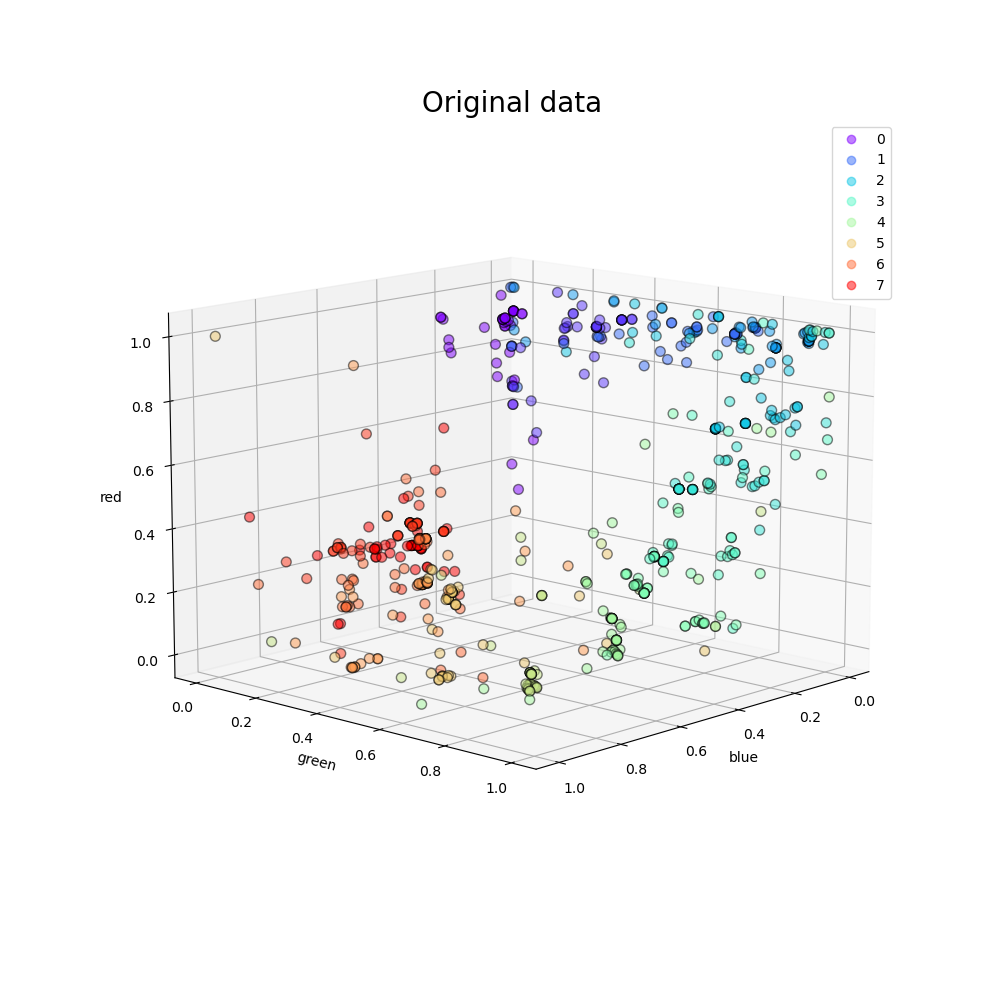

In [9]:
fig = plt.figure(figsize = (10, 10),dpi=100) 
ax = plt.axes(projection ="3d") 
l3d = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y,alpha=0.5, edgecolor='k',s=50, cmap='rainbow')
ax.set_title('Original data',fontsize=20)
ax.set_xlabel('%s' % (df.columns[0]))
ax.set_ylabel('%s' % (df.columns[1]))
ax.set_zlabel('%s' % (df.columns[2]))
ax.legend(l3d.legend_elements()[0],np.unique(y))
ax.view_init(elev=12, azim=43)


# 5.- Modelo DBSCAN

In [10]:
# eps = entrega el radio del vecindario del punto p, donde se encuentra el clusters
# min_sample = numero minimo que sea clasificar el clusters
# metricas del algoritmo
db = DBSCAN(eps = .139, min_samples = 10, metric = 'euclidean',algorithm = 'auto') 
db.fit(X)


DBSCAN(eps=0.139, min_samples=10)

In [14]:
labels = db.labels_ 
num = np.unique(labels)
num
# -1 : label con datos ruidozo

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

<IPython.core.display.Javascript object>


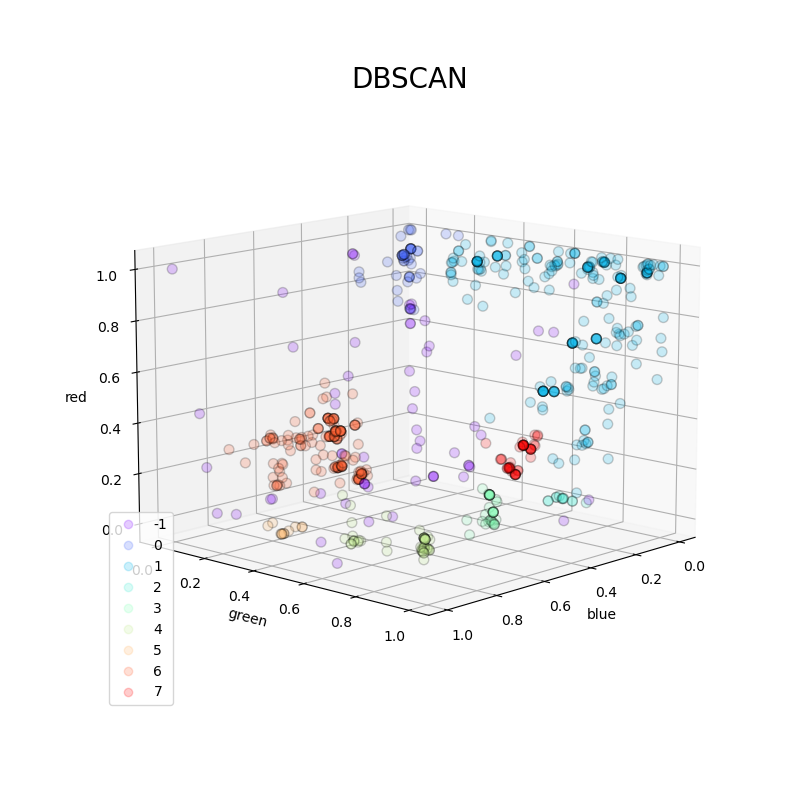

In [12]:
fig = plt.figure(figsize = (8, 8),dpi=100) 
ax = plt.axes(projection ="3d") 
l3d = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=labels,alpha=0.2, edgecolor='k',s=50, cmap='rainbow')
ax.set_title('DBSCAN',fontsize=20)
ax.set_xlabel('%s' % (df.columns[0]))
ax.set_ylabel('%s' % (df.columns[1]))
ax.set_zlabel('%s' % (df.columns[2]))
ax.legend(l3d.legend_elements()[0],np.unique(labels))
ax.view_init(elev=12, azim=43)


In [13]:
n_cl = len(set(labels)) - (1 if -1 in labels else 0)
noise = list(labels).count(-1)

print('Número estimado de clusters: %d' % n_cl)
print('Número estimado de puntos ruidos: %d' % noise)
print("Homogeneidad: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completitud: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Número estimado de clusters: 8
Número estimado de puntos ruidos: 61
Homogeneidad: 0.418
Completitud: 0.631
V-measure: 0.503
